## Special Topics - Introduction to Deep Learning

#### Prof. Thomas da Silva Paula

### Feature extraction example

* Using Keras
* Using VGG-16

## Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

plt.rcParams['figure.figsize'] = [15, 5]

## Creating the model

In [3]:
model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Feature extraction example

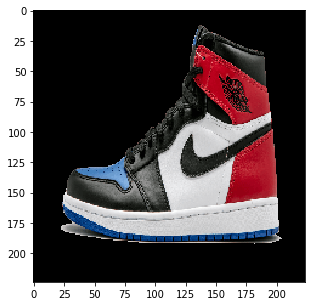

In [5]:
img_path = '../../sample_images/sneakers.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

We need to prepare the image using the same preprocessing steps used to train the model. Fortunetly, Keras has methods to help us out.

In [6]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

Checking shape and type

In [7]:
print(features.shape, features.dtype)

(1, 512) float32


Printing features

In [9]:
from pprint import pprint

In [10]:
pprint(features)

array([[0.0000000e+00, 6.0639971e-01, 1.2241087e+00, 0.0000000e+00,
        7.6285583e-01, 9.3353331e-01, 4.7094667e-01, 0.0000000e+00,
        0.0000000e+00, 1.9924963e+01, 1.4466014e+00, 0.0000000e+00,
        1.2180121e+00, 0.0000000e+00, 0.0000000e+00, 1.6389935e+01,
        1.7182510e-01, 2.0266817e+00, 0.0000000e+00, 6.7011623e+00,
        0.0000000e+00, 2.8219001e+00, 1.4962605e-01, 2.9597852e+00,
        0.0000000e+00, 2.5504065e-01, 1.6535183e+00, 3.8728275e+00,
        0.0000000e+00, 6.0658491e-01, 0.0000000e+00, 0.0000000e+00,
        3.1740711e+00, 3.3034900e-01, 0.0000000e+00, 2.9369137e-01,
        0.0000000e+00, 8.2455468e-01, 1.0085965e-01, 0.0000000e+00,
        3.1839323e+00, 1.7112944e+01, 7.4131870e-01, 9.6320772e-01,
        5.1401488e-02, 4.0519438e+00, 6.6801023e+00, 1.3918856e+01,
        4.2468858e+00, 8.6180413e-01, 3.4711781e+00, 5.6451054e+00,
        1.0152748e+01, 1.5829812e+00, 0.0000000e+00, 3.6567924e+00,
        5.9682503e+00, 6.8307206e-02, 7.6533681e

In [8]:
print(features)

[[0.0000000e+00 6.0639971e-01 1.2241087e+00 0.0000000e+00 7.6285583e-01
  9.3353331e-01 4.7094667e-01 0.0000000e+00 0.0000000e+00 1.9924963e+01
  1.4466014e+00 0.0000000e+00 1.2180121e+00 0.0000000e+00 0.0000000e+00
  1.6389935e+01 1.7182510e-01 2.0266817e+00 0.0000000e+00 6.7011623e+00
  0.0000000e+00 2.8219001e+00 1.4962605e-01 2.9597852e+00 0.0000000e+00
  2.5504065e-01 1.6535183e+00 3.8728275e+00 0.0000000e+00 6.0658491e-01
  0.0000000e+00 0.0000000e+00 3.1740711e+00 3.3034900e-01 0.0000000e+00
  2.9369137e-01 0.0000000e+00 8.2455468e-01 1.0085965e-01 0.0000000e+00
  3.1839323e+00 1.7112944e+01 7.4131870e-01 9.6320772e-01 5.1401488e-02
  4.0519438e+00 6.6801023e+00 1.3918856e+01 4.2468858e+00 8.6180413e-01
  3.4711781e+00 5.6451054e+00 1.0152748e+01 1.5829812e+00 0.0000000e+00
  3.6567924e+00 5.9682503e+00 6.8307206e-02 7.6533681e-01 1.1373340e+00
  0.0000000e+00 4.6766024e+00 3.4389660e-01 0.0000000e+00 0.0000000e+00
  2.8509095e+00 5.4107890e+00 4.1712832e+00 0.0000000e+00 0.0000

### Features can be used for comparison

In [11]:
def load_and_extract_features(img_path):
    # Loading rgba to show the image properly
    img = image.load_img(img_path, color_mode='rgba')
    plt.imshow(img)
    
    # Loading rgb with expected input size
    img = image.load_img(img_path, target_size=(224, 224))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    
    return features

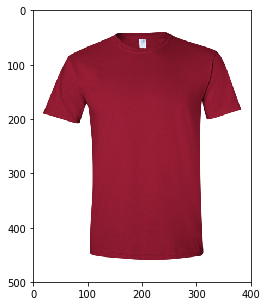

In [12]:
features_tshirt1 = load_and_extract_features('../../sample_images/tshirt.png')

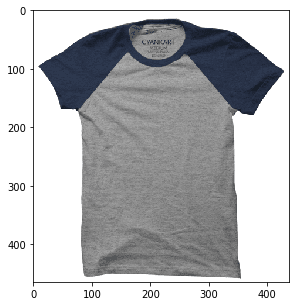

In [13]:
features_tshirt2 = load_and_extract_features('../../sample_images/tshirt2.png')

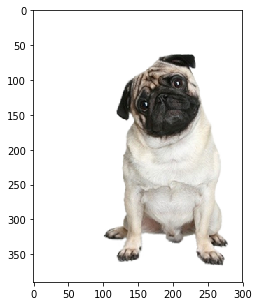

In [14]:
features_pug = load_and_extract_features('../../sample_images/pug.png')

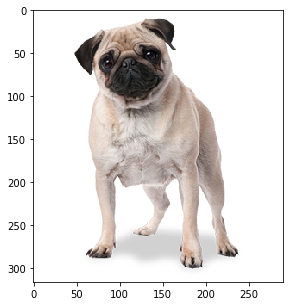

In [15]:
features_pug2 = load_and_extract_features('../../sample_images/pug2.png')

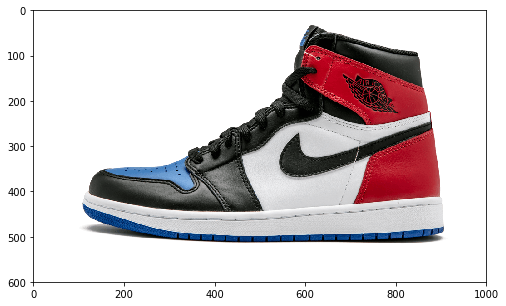

In [16]:
features_sneakers = load_and_extract_features('../../sample_images/sneakers.png')

### Computing distance between features
We can then compute the distance between these features and see whether given images are more similar to each other

#### T-shirt 1 vs Pug 1

In [17]:
from scipy.spatial.distance import cosine

In [18]:
distance = cosine(features_tshirt1, features_pug)
print(distance)

0.8084378838539124


#### T-shirt 2 vs Pug 2

In [19]:
distance = cosine(features_tshirt2, features_pug2)
print(distance)

0.7392519414424896


#### Pug 1 vs Sneakers

In [20]:
distance = cosine(features_pug, features_sneakers)
print(distance)

0.7406953275203705


#### T-shirt 1 vs T-shirt 2

In [21]:
distance = cosine(features_tshirt1, features_tshirt2)
print(distance)

0.27799564599990845


#### Pug 1 vs Pug 2

In [22]:
distance = cosine(features_pug, features_pug2)
print(distance)

0.13096392154693604


In [23]:
distance = cosine(features_pug, features_pug)
print(distance)

0.0


### We can also use features to train classifiers
We'll see how it works in the assignment :)